In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

## Singlular instrument

In [128]:
inst = 0
instrPrice = prices[inst]
for i in range(1,len(instrPrice)):
    x_current = instrPrice[i]
    x_prev = instrPrice[:i]
    diff = x_current-x_prev
    tdiff = list(reversed(range(1,len(x_prev)+1)))
    gradient = diff/tdiff
    
    x_next = gradient+x_current
    x_next = np.round(x_next,2)
    # round down a order of magnitude due to error bars
    print(x_current,np.round(x_next.mean(),1))

38.11 38.0
37.9 37.7
37.64 37.4
37.7 37.6
37.67 37.6
37.6 37.5
37.6 37.6
37.7 37.7
37.56 37.5
37.59 37.6
37.88 37.9
37.72 37.7
37.76 37.8
37.76 37.8
37.57 37.5
37.6 37.6
37.54 37.5
37.69 37.7
37.76 37.8
38.0 38.1
37.93 38.0
37.85 37.9
37.88 37.9
37.66 37.6
37.74 37.7
37.55 37.5
37.65 37.6
37.66 37.7
37.45 37.4
37.1 37.0
37.14 37.1
37.2 37.2
37.43 37.4
37.47 37.5
37.44 37.4
37.06 37.0
37.31 37.3
37.39 37.4
37.56 37.6
37.41 37.4
37.29 37.3
37.1 37.1
37.04 37.0
37.12 37.1
37.03 37.0
36.98 36.9
36.87 36.8
36.94 36.9
36.83 36.8
37.12 37.1
37.21 37.2
36.91 36.9
36.86 36.8
36.97 37.0
37.06 37.1
37.22 37.2
37.13 37.1
36.83 36.8
36.95 36.9
37.11 37.1
36.99 37.0
37.0 37.0
36.96 36.9
36.89 36.9
36.97 37.0
37.09 37.1
37.07 37.1
37.09 37.1
37.03 37.0
37.17 37.2
37.09 37.1
37.16 37.2
37.28 37.3
37.26 37.3
37.39 37.4
37.35 37.4
37.57 37.6
37.87 37.9
38.0 38.0
37.93 38.0
38.05 38.1
37.83 37.8
37.5 37.5
37.55 37.6
37.81 37.8
37.67 37.7
37.92 37.9
37.78 37.8
37.69 37.7
37.71 37.7
37.72 37.7
37.9 37.9
37

Probability distribution of next price

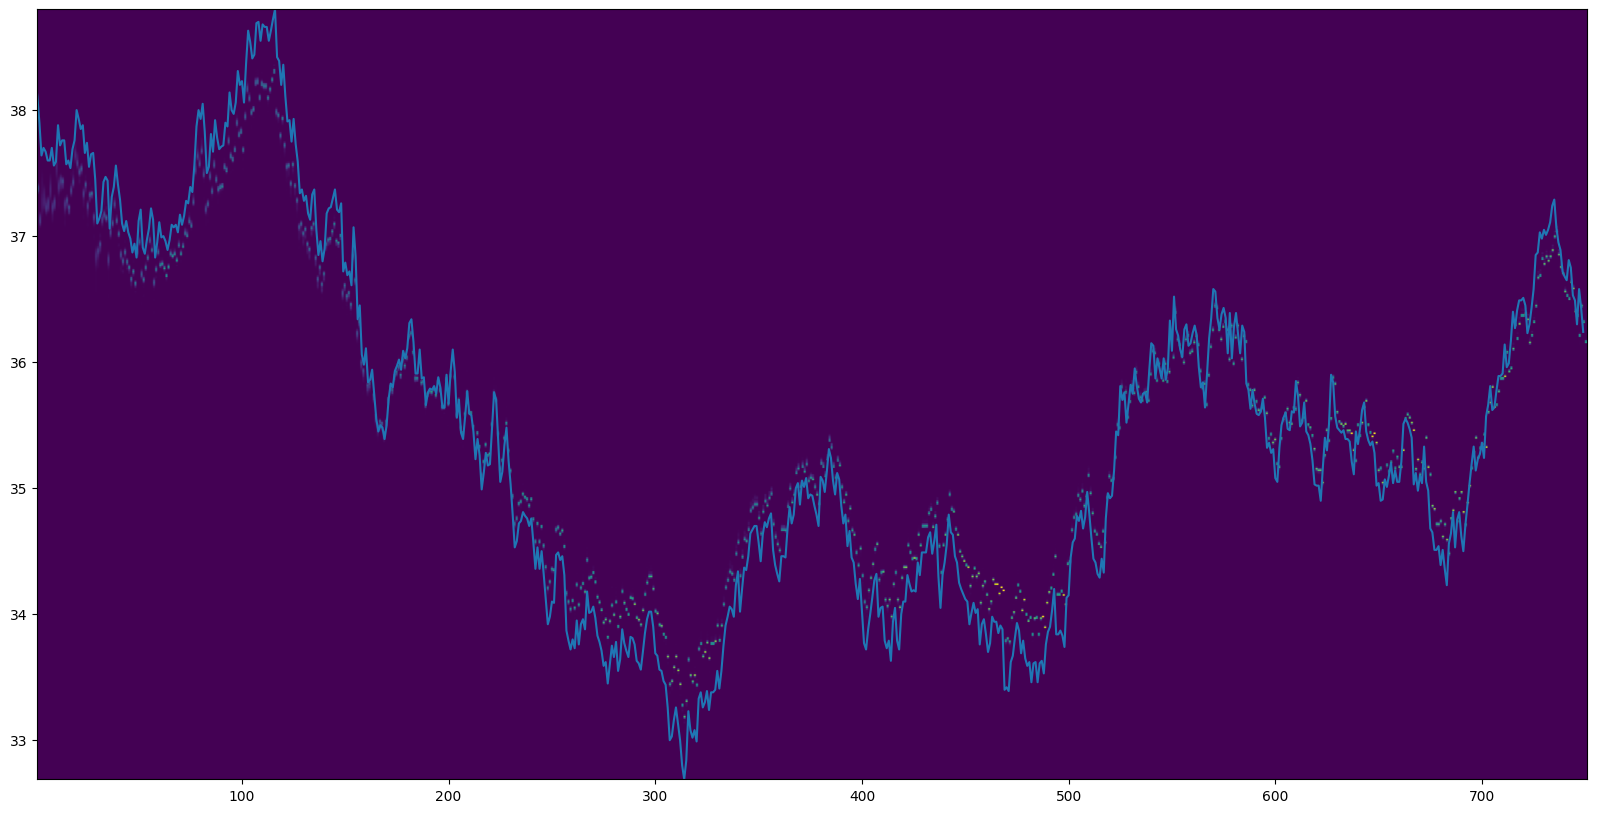

In [129]:
from scipy.stats import gaussian_kde

def softmax(x):
    """Compute softmax values for each set of scores in x."""
    x = np.asarray(x)
    exps = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exps / np.sum(exps)


density_mat = []
pmax = instrPrice.max()
pmin = instrPrice.min()
padding = (pmax - pmin) * 0.1
price_grid = np.linspace(pmin - padding, pmax + padding, 500)
for i in range(1,len(instrPrice)):
    x_current = instrPrice[i]
    x_prev = instrPrice[:i]
    diff = x_current-x_prev
    tdiff = list(reversed(range(1,len(x_prev)+1)))
    gradient = diff/tdiff
    
    x_next = gradient+x_current
    x_next = np.round(x_next,2)

    scaled = np.round(x_next * 100).astype(int)
    
    # Softmax PMF
    min_val = scaled.min()
    max_val = scaled.max()
    full_range = np.arange(min_val, max_val + 1)/100
    counts = np.bincount(scaled)[min_val:]
    prob = softmax(counts)
    
    if i == 1:
        continue
    # Gaussian KDE
    kde = gaussian_kde(x_next)
    density = kde(price_grid)
    y = density/np.sum(density)
    density_mat.append(y)

density_mat = np.array(density_mat).T
plt.figure(figsize=(20,10))
plt.plot(instrPrice)
plt.imshow(
    density_mat,
    aspect='auto',
    origin='lower',
    extent=[1, 751, instrPrice.min(), instrPrice.max()],
    cmap='viridis'
)
plt.show()